In [1]:
import sys, os

src = r"C:\Users\user\Desktop\Coding mo\AutoML proj1\task 1\AutoML Project Molham\src" # copy the location of the folder that has paths.py file using (ctrl + shift + C ) and paste it here    
sys.path.append(src)

from paths import *

get_paths()

sys.path.append(SRC_PATH)

from boosting_models import *
from pipeline import *



In [2]:
# ---------------- Task 2+9 ----------------

def loop_dfs_and_evaluate_lightgbm():
    for dataset_file in data_dict_classification_only.keys():
        dataset_summary = []
        runtime_memory_rows = []
        dataset_base = os.path.splitext(dataset_file)[0]

        for seed in RANDOM_SEEDS:
            np.random.seed(seed)
            random.seed(seed)

            df_train = splits_dict[dataset_file]['train']
            df_test = splits_dict[dataset_file]['test']
            target_col = TARGET_COLS[dataset_file]

            X_train = df_train.drop(columns=[target_col])
            y_train = df_train[target_col]
            X_test = df_test.drop(columns=[target_col])
            y_test = df_test[target_col]

            start_time = time.time()
            model = lgb.LGBMClassifier(random_state=seed)
            model.fit(X_train, y_train)
            training_runtime_sec = round(time.time() - start_time, 3)

            temp_model_file = os.path.join("temp_lgb_models", f"{dataset_base}_{seed}.pkl")
            os.makedirs("temp_lgb_models", exist_ok=True)
            with open(temp_model_file, "wb") as f:
                pickle.dump(model, f)
            total_bytes = os.path.getsize(temp_model_file)
            model_size_mb = round(total_bytes / (1024 * 1024), 3)
            os.remove(temp_model_file)

            memory_usage_mb = get_memory_usage_mb()

            results = evaluate_and_save_results_boosting(df_train, df_test, model, dataset_file)

            runtime_memory_rows.append({
                "dataset": dataset_file,
                "seed": seed,
                "training_runtime_sec": training_runtime_sec,
                "model_size_MB": model_size_mb,
                "memory_usage_MB": memory_usage_mb
            })

            dataset_summary.append({
                'dataset': dataset_file,
                'seed': seed,
                **results,
                'runtime': training_runtime_sec
            })

            del model
            gc.collect()

        output_path = os.path.join(BOOSTINGS_PATH, f"lightgbm_{dataset_base}_summary.csv")
        pd.DataFrame(dataset_summary).to_csv(output_path, index=False)

        task2_output_path = os.path.join(RUNTIME_MEMORY_TASK2_BOOSTINGS_PATH, f"lightgbm_{dataset_base}_task2_runtime_memory_metrics.csv")
        pd.DataFrame(runtime_memory_rows).to_csv(task2_output_path, index=False)


loop_dfs_and_evaluate_lightgbm()




[LightGBM] [Info] Number of positive: 46099, number of negative: 83573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 129672, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355505 -> initscore=-0.594929
[LightGBM] [Info] Start training from score -0.594929
[LightGBM] [Info] Number of positive: 46099, number of negative: 83573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 129672, number of used features: 146
[LightGBM] [Info

In [3]:
for dataset_name in data_dict_classification_only.keys():
    dataset_base = dataset_name.replace('.csv', '')
    
    csv_file1 = os.path.join(BOOSTINGS_PATH, f"lightgbm_{dataset_base}_summary.csv")
    csv_file2 = os.path.join(RUNTIME_MEMORY_TASK2_BOOSTINGS_PATH, f"lightgbm_{dataset_base}_task2_runtime_memory_metrics.csv")

    print(f"CSV for {dataset_name.replace('.csv', '')}: lightgbm_{dataset_base}_summary.csv")
    df1 = pd.read_csv(csv_file1)
    display(df1)

    print(f"CSV for {dataset_name.replace('.csv', '')}: lightgbm_{dataset_base}_task1_runtime_memory_metrics.csv")
    df2 = pd.read_csv(csv_file2)
    display(df2)



CSV for modeldata: lightgbm_modeldata_summary.csv


dataset  seed  accuracy        f1  precision   recall  runtime
0  modeldata.csv    42   0.93081  0.930982   0.931278  0.93081    2.698
1  modeldata.csv   123   0.93081  0.930982   0.931278  0.93081    0.587

CSV for modeldata: lightgbm_modeldata_task1_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB
0  modeldata.csv    42                 2.698          0.352         7593.152
1  modeldata.csv   123                 0.587          0.352         7672.254

CSV for titanic: lightgbm_titanic_summary.csv


dataset  seed  accuracy        f1  precision    recall  runtime
0  titanic.csv    42  0.793296  0.792613   0.792387  0.793296    0.067
1  titanic.csv   123  0.793296  0.792613   0.792387  0.793296    0.060

CSV for titanic: lightgbm_titanic_task1_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB
0  titanic.csv    42                 0.067           0.37         7162.062
1  titanic.csv   123                 0.060           0.37         7163.965

CSV for train: lightgbm_train_summary.csv


dataset  seed  accuracy   f1  precision  recall  runtime
0  train.csv    42       1.0  1.0        1.0     1.0    0.032
1  train.csv   123       1.0  1.0        1.0     1.0    0.033

CSV for train: lightgbm_train_task1_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB
0  train.csv    42                 0.032          0.211         7164.840
1  train.csv   123                 0.033          0.211         7164.918

CSV for wine: lightgbm_wine_summary.csv


dataset  seed  accuracy   f1  precision  recall  runtime
0  wine.csv    42       1.0  1.0        1.0     1.0    0.038
1  wine.csv   123       1.0  1.0        1.0     1.0    0.093

CSV for wine: lightgbm_wine_task1_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB
0  wine.csv    42                 0.038          0.256         7165.691
1  wine.csv   123                 0.093          0.256         7166.602

In [4]:

# ---------------- Task 2+9 ----------------

def loop_dfs_and_evaluate_lightgbm_tuned():
    for dataset_file in data_dict_classification_only.keys():

        dataset_summary = []
        runtime_memory_rows = []

        dataset_base = dataset_file.replace(".csv", "")

        for seed in RANDOM_SEEDS:

            np.random.seed(seed)
            random.seed(seed)

            df_train = splits_dict[dataset_file]['train']
            df_test = splits_dict[dataset_file]['test']
            target_col = TARGET_COLS[dataset_file]

            X_train = df_train.drop(columns=[target_col])
            y_train = df_train[target_col]
            X_test = df_test.drop(columns=[target_col])
            y_test = df_test[target_col]

            model = LGBMClassifier(random_state=seed)

            search = RandomizedSearchCV(
                model,
                param_distributions=param_grid,
                n_iter=10,
                scoring='accuracy',
                cv=3,
                random_state=seed,
                n_jobs=-1,
                verbose=0
            )

            start_time = time.time()
            search.fit(X_train, y_train)
            training_runtime_sec = round(time.time() - start_time, 3)

            best_model = search.best_estimator_
            best_params = search.best_params_

            infer_start = time.time()
            results = evaluate_and_save_results_boosting(df_train, df_test, best_model, dataset_file)
            inference_runtime_sec = round(time.time() - infer_start, 6)

            temp_model_file = os.path.join("temp_lightgbm_tuned_models", f"{dataset_base}_{seed}.pkl")
            os.makedirs("temp_lightgbm_tuned_models", exist_ok=True)
            with open(temp_model_file, "wb") as f:
                pickle.dump(best_model, f)

            total_bytes = os.path.getsize(temp_model_file)
            model_size_mb = round(total_bytes / (1024 * 1024), 3)
            os.remove(temp_model_file)

            memory_usage_mb = get_memory_usage_mb()
            cpu_usage_percent = psutil.cpu_percent(interval=None)

            dataset_summary.append({
                "dataset": dataset_file,
                "seed": seed,
                **results,
                "training_runtime_sec": training_runtime_sec,
                "inference_runtime_sec": inference_runtime_sec,
                "best_params": str(best_params)
            })

            runtime_memory_rows.append({
                "dataset": dataset_file,
                "seed": seed,
                "training_runtime_sec": training_runtime_sec,
                "model_size_MB": model_size_mb,
                "memory_usage_MB": memory_usage_mb,
                "inference_time_per_sample_sec": inference_runtime_sec / len(X_test),
                "cpu_usage_percent": cpu_usage_percent
            })

            feature_importances = best_model.feature_importances_
            importance_df = (
                pd.DataFrame({'feature': best_model.feature_name_, 'importance': feature_importances})
                .sort_values(by='importance', ascending=False)
                .head(15)
            )

            plt.figure(figsize=(14, 8))
            sns.barplot(data=importance_df, x='importance', y='feature')
            plt.title(f"LightGBM Tuned Feature Importance\n{dataset_file} (seed={seed})")
            plt.tight_layout()

            plot_file = os.path.join(
                FEATURE_IMPORTANCE_PATH,
                f"lightgbm_importance_{dataset_base}_seed{seed}.png"
            )
            plt.savefig(plot_file)
            plt.close()

            del X_train, X_test, y_train, y_test, model, search, best_model
            gc.collect()

        output_path = os.path.join(
            BOOSTINGS_TUNED_PATH,
            f"lightgbm_tuned_{dataset_base}_summary.csv"
        )
        pd.DataFrame(dataset_summary).to_csv(output_path, index=False)

        task2_output_path = os.path.join(
            RUNTIME_MEMORY_TASK2_BOOSTINGS_TUNED_PATH,
            f"lightgbm_tuned_{dataset_base}_runtime_memory_metrics.csv"
        )
        pd.DataFrame(runtime_memory_rows).to_csv(task2_output_path, index=False)

        json_path = os.path.join(
            RUNTIME_MEMORY_TASK2_BOOSTINGS_TUNED_PATH,
            f"lightgbm_tuned_{dataset_base}_runtime_memory_metrics_in_json.json"
        )
        with open(json_path, 'w') as f:
            json.dump(runtime_memory_rows, f, indent=2)

loop_dfs_and_evaluate_lightgbm_tuned()



[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 46099, number of negative: 83573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 129672, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355505 -> initscore=-0.594929
[LightGBM] [Info] Start training from score -0.594929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

CSV for modeldata: lightgbm_tuned_modeldata_summary.csv


dataset  seed  accuracy      f1  precision    recall  training_runtime_sec  inference_runtime_sec                                        best_params
0  modeldata.csv    42  0.932198  0.9324   0.932783  0.932198                39.397               0.182015  {'subsample': 1.0, 'n_estimators': 300, 'min_c...
1  modeldata.csv   123  0.932198  0.9324   0.932783  0.932198                35.411               0.169853  {'subsample': 0.8, 'n_estimators': 300, 'min_c...

CSV for modeldata: lightgbm_tuned_modeldata_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  modeldata.csv    42                39.397          0.866         7389.602                       0.000006               71.6
1  modeldata.csv   123                35.411          0.866         7396.191                       0.000005               68.1

Feature Importance for modeldata (seed=42):


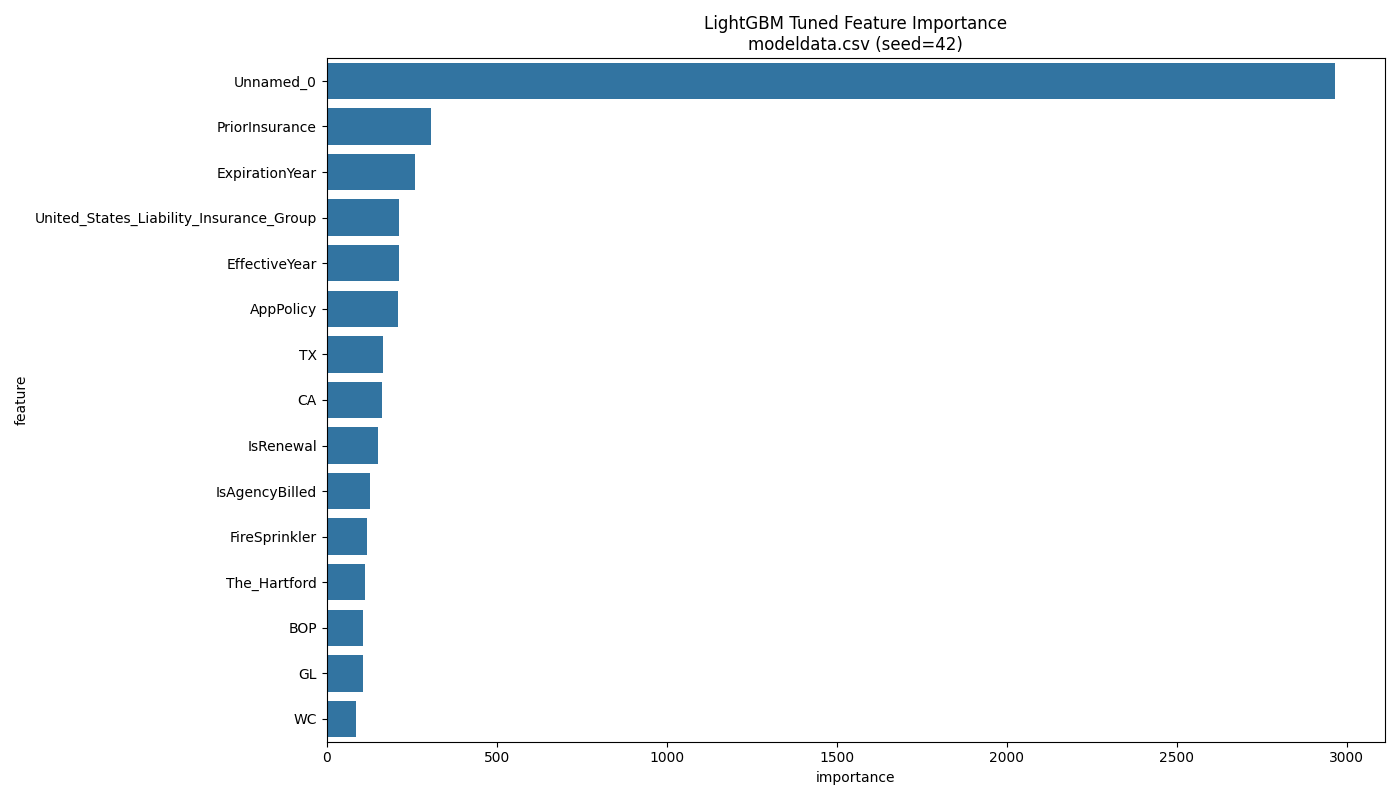

Feature Importance for modeldata (seed=123):


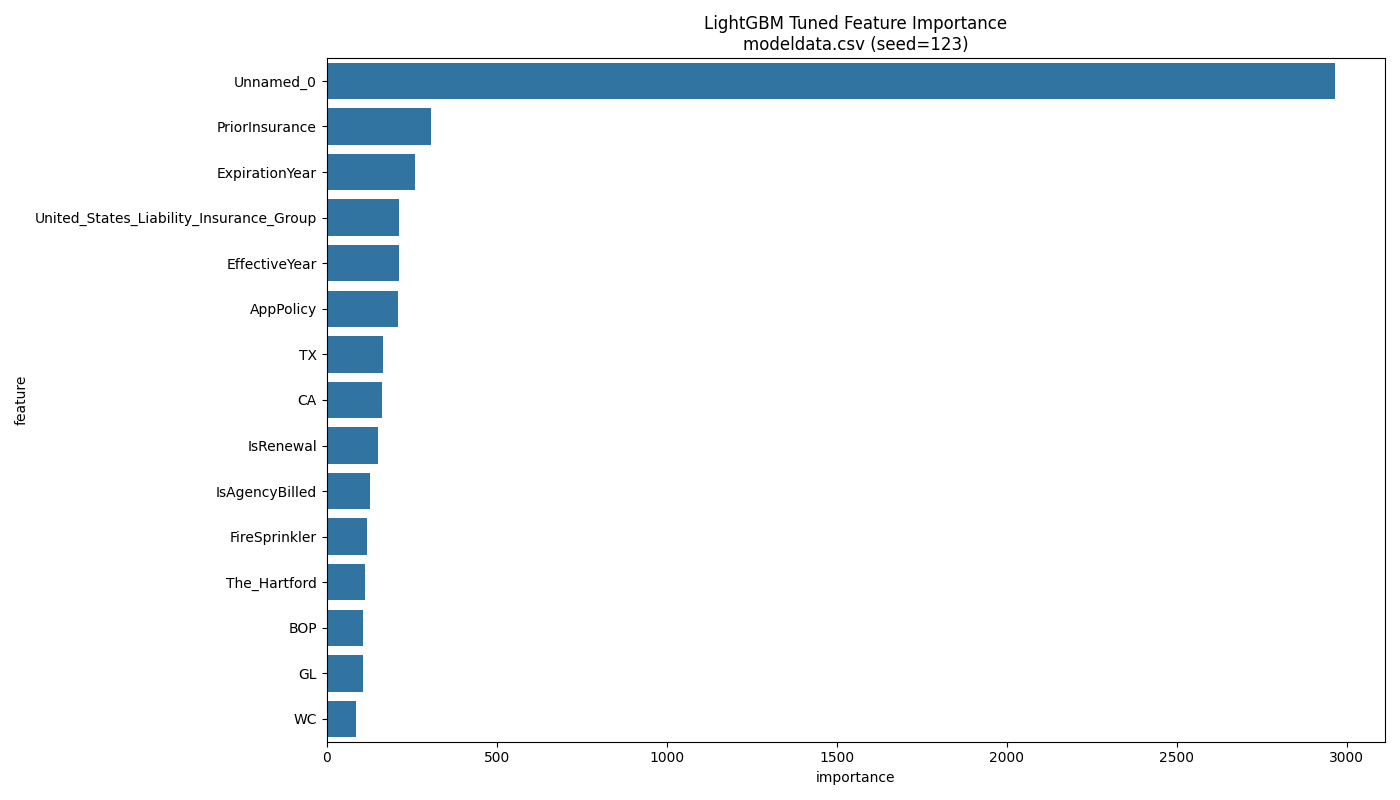

CSV for titanic: lightgbm_tuned_titanic_summary.csv


dataset  seed  accuracy        f1  precision    recall  training_runtime_sec  inference_runtime_sec                                        best_params
0  titanic.csv    42  0.804469  0.802157   0.804116  0.804469                 1.079               0.010591  {'subsample': 1.0, 'n_estimators': 300, 'min_c...
1  titanic.csv   123  0.810056  0.806810   0.811340  0.810056                 1.484               0.010900  {'subsample': 0.8, 'n_estimators': 300, 'min_c...

CSV for titanic: lightgbm_tuned_titanic_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  titanic.csv    42                 1.079          0.641         6916.660                       0.000059               93.8
1  titanic.csv   123                 1.484          0.329         6919.059                       0.000061               95.2

Feature Importance for titanic (seed=42):


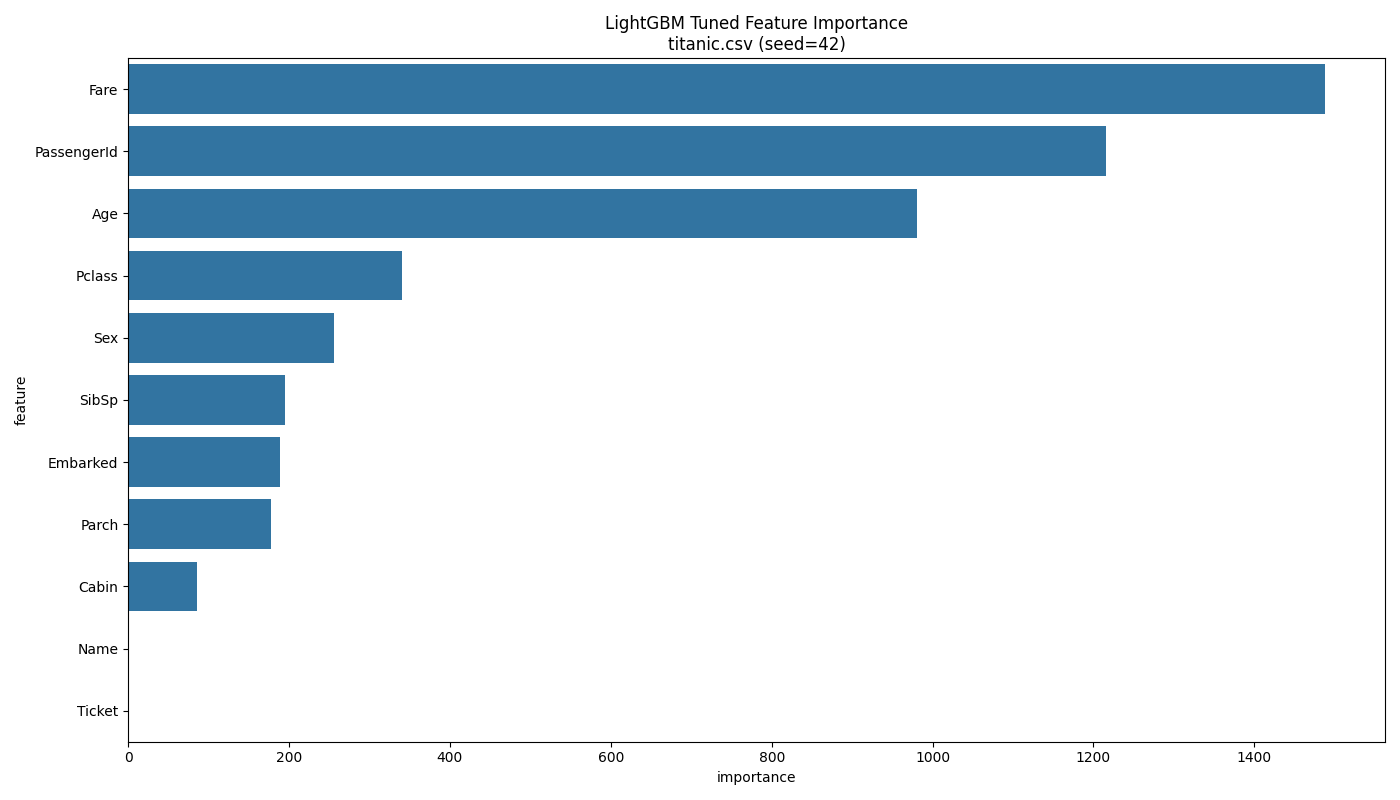

Feature Importance for titanic (seed=123):


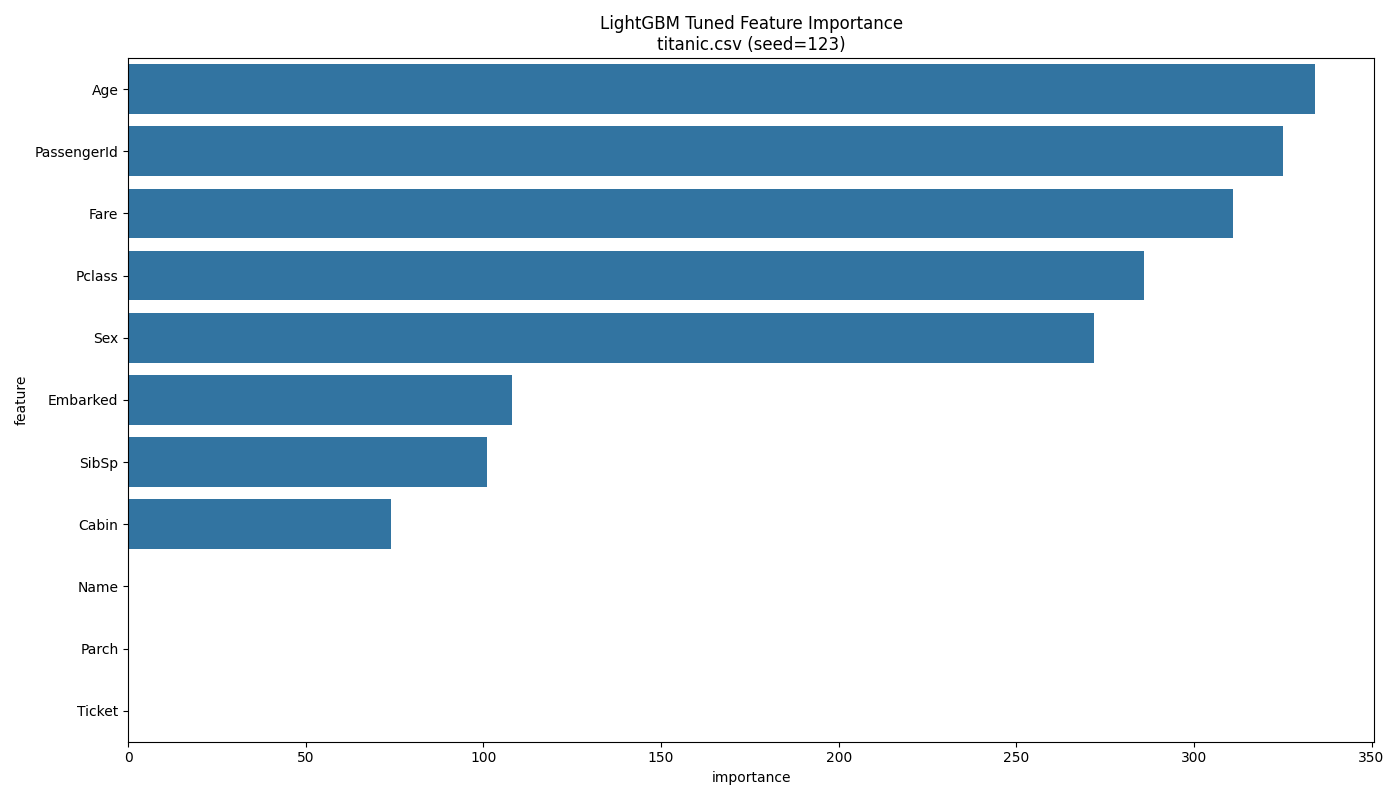

CSV for train: lightgbm_tuned_train_summary.csv


dataset  seed  accuracy   f1  precision  recall  training_runtime_sec  inference_runtime_sec                                        best_params
0  train.csv    42       1.0  1.0        1.0     1.0                 0.645               0.009533  {'subsample': 1.0, 'n_estimators': 100, 'min_c...
1  train.csv   123       1.0  1.0        1.0     1.0                 0.812               0.008505  {'subsample': 0.8, 'n_estimators': 300, 'min_c...

CSV for train: lightgbm_tuned_train_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  train.csv    42                 0.645          0.157         6923.797                       0.000318               93.5
1  train.csv   123                 0.812          0.521         6930.371                       0.000284               94.5

Feature Importance for train (seed=42):


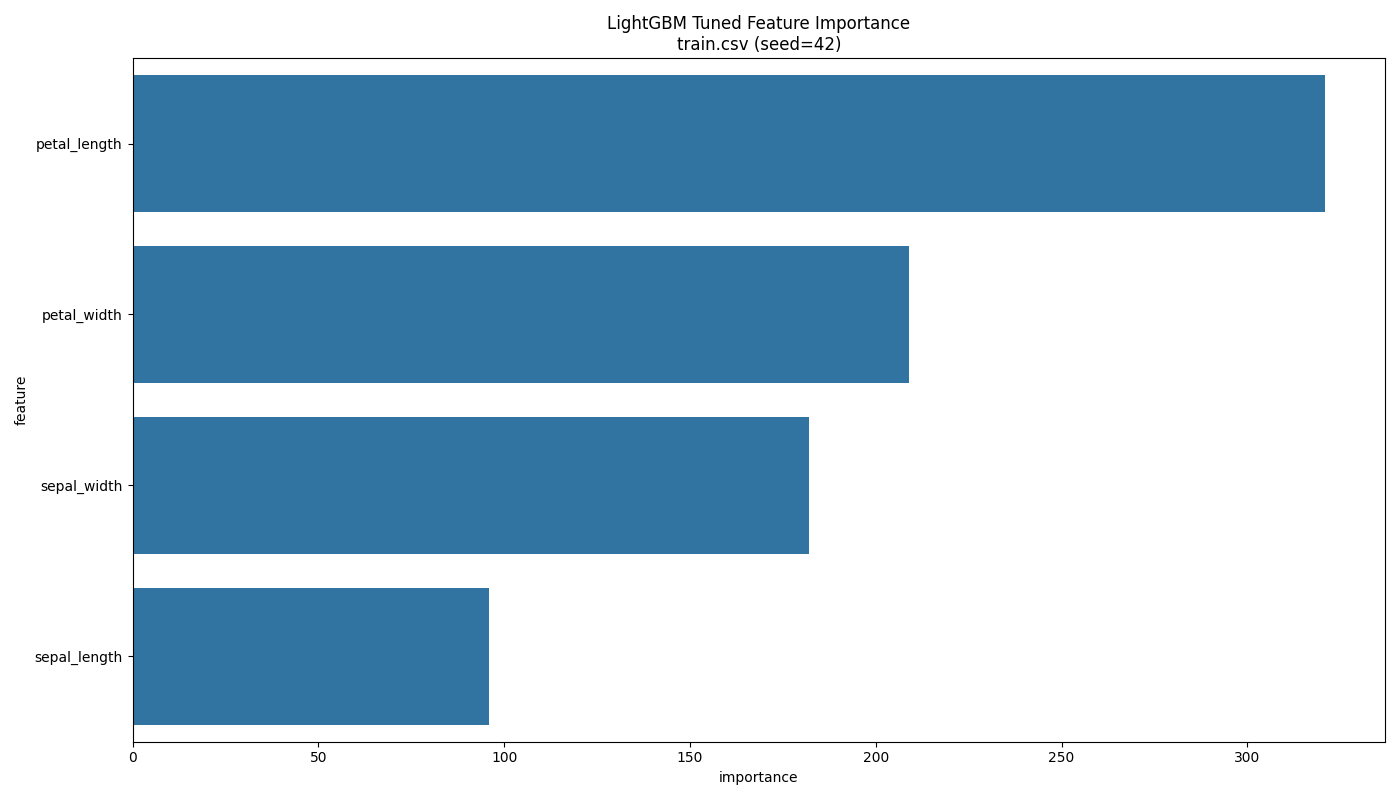

Feature Importance for train (seed=123):


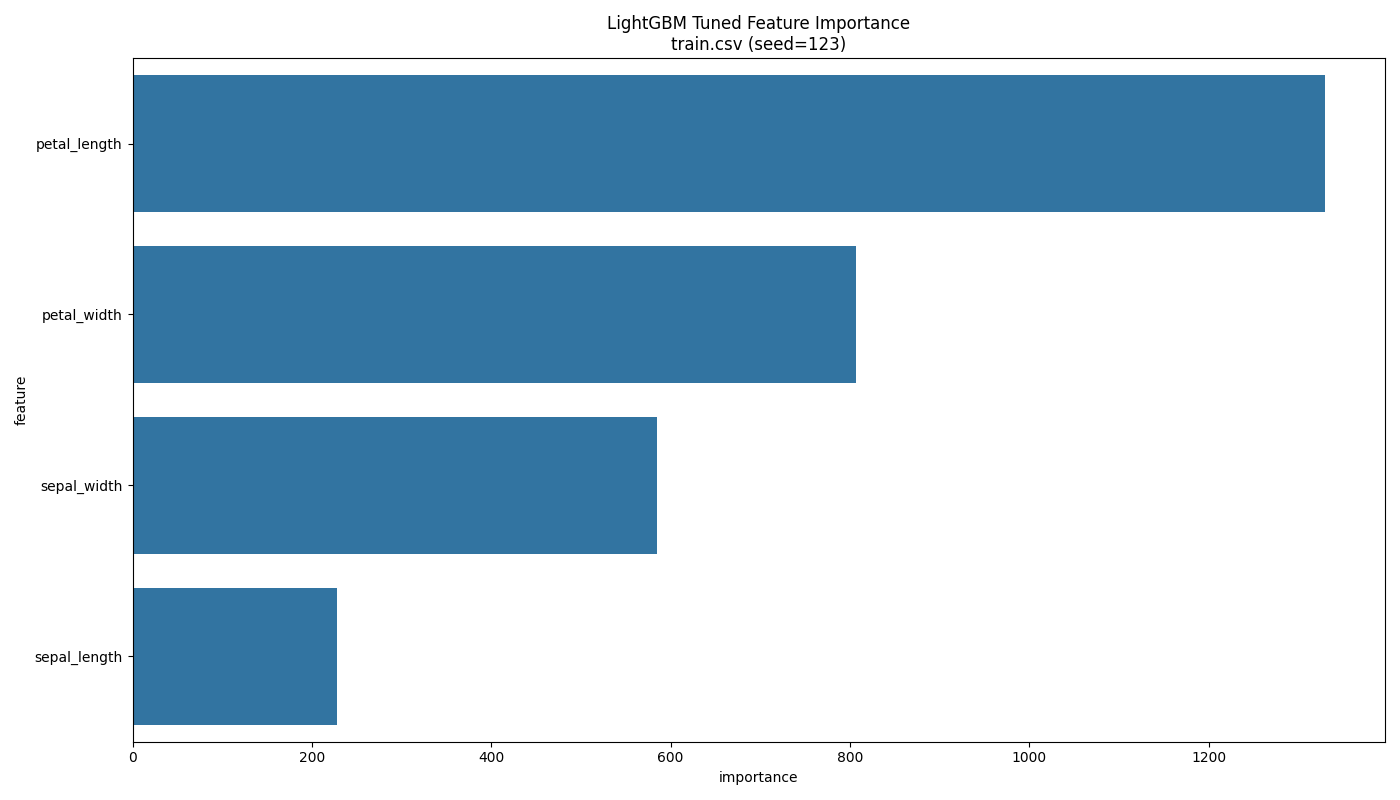

CSV for wine: lightgbm_tuned_wine_summary.csv


dataset  seed  accuracy   f1  precision  recall  training_runtime_sec  inference_runtime_sec                                        best_params
0  wine.csv    42       1.0  1.0        1.0     1.0                 0.679               0.009520  {'subsample': 1.0, 'n_estimators': 100, 'min_c...
1  wine.csv   123       1.0  1.0        1.0     1.0                 0.771               0.009505  {'subsample': 1.0, 'n_estimators': 100, 'min_c...

CSV for wine: lightgbm_tuned_wine_runtime_memory_metrics.csv


dataset  seed  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  wine.csv    42                 0.679          0.122         6935.457                       0.000264               94.3
1  wine.csv   123                 0.771          0.087         6940.500                       0.000264               94.7

Feature Importance for wine (seed=42):


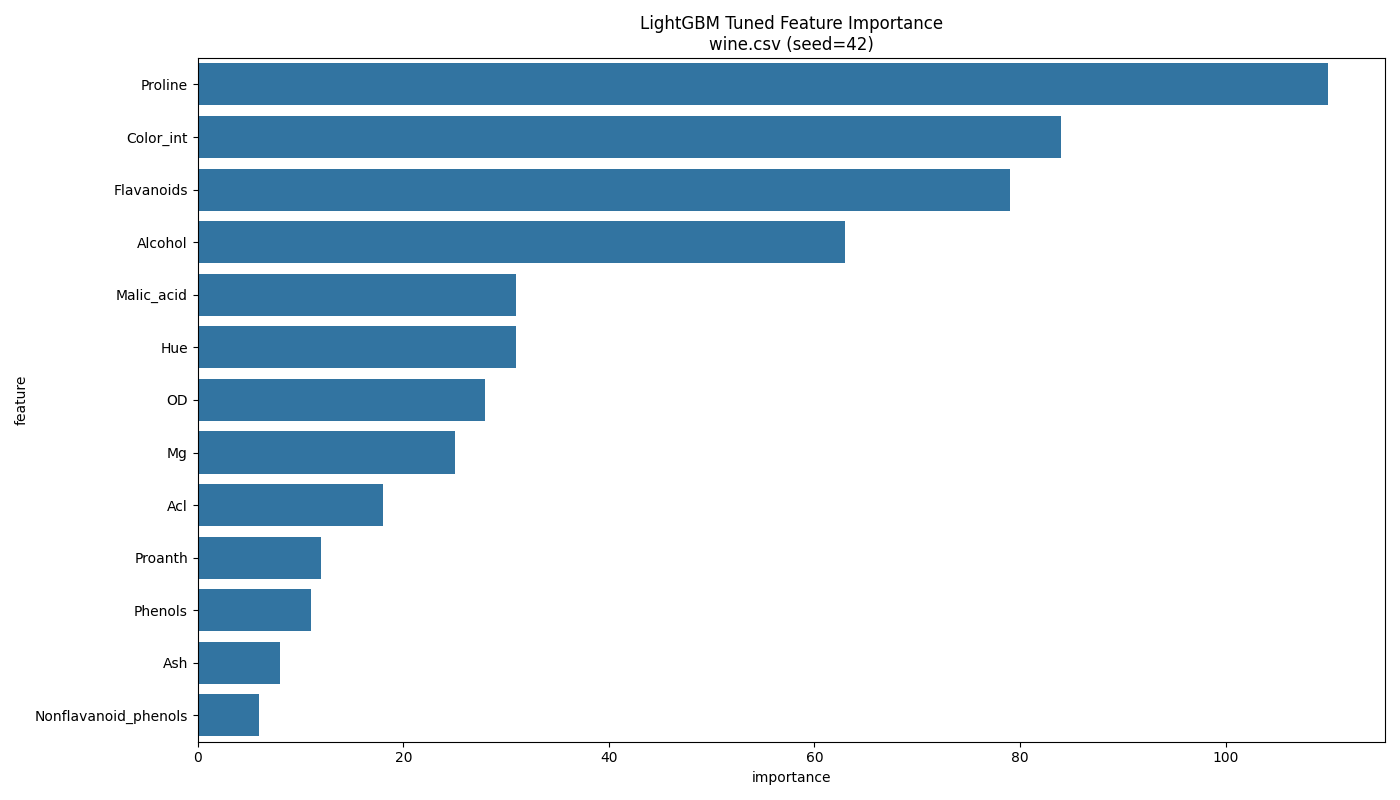

Feature Importance for wine (seed=123):


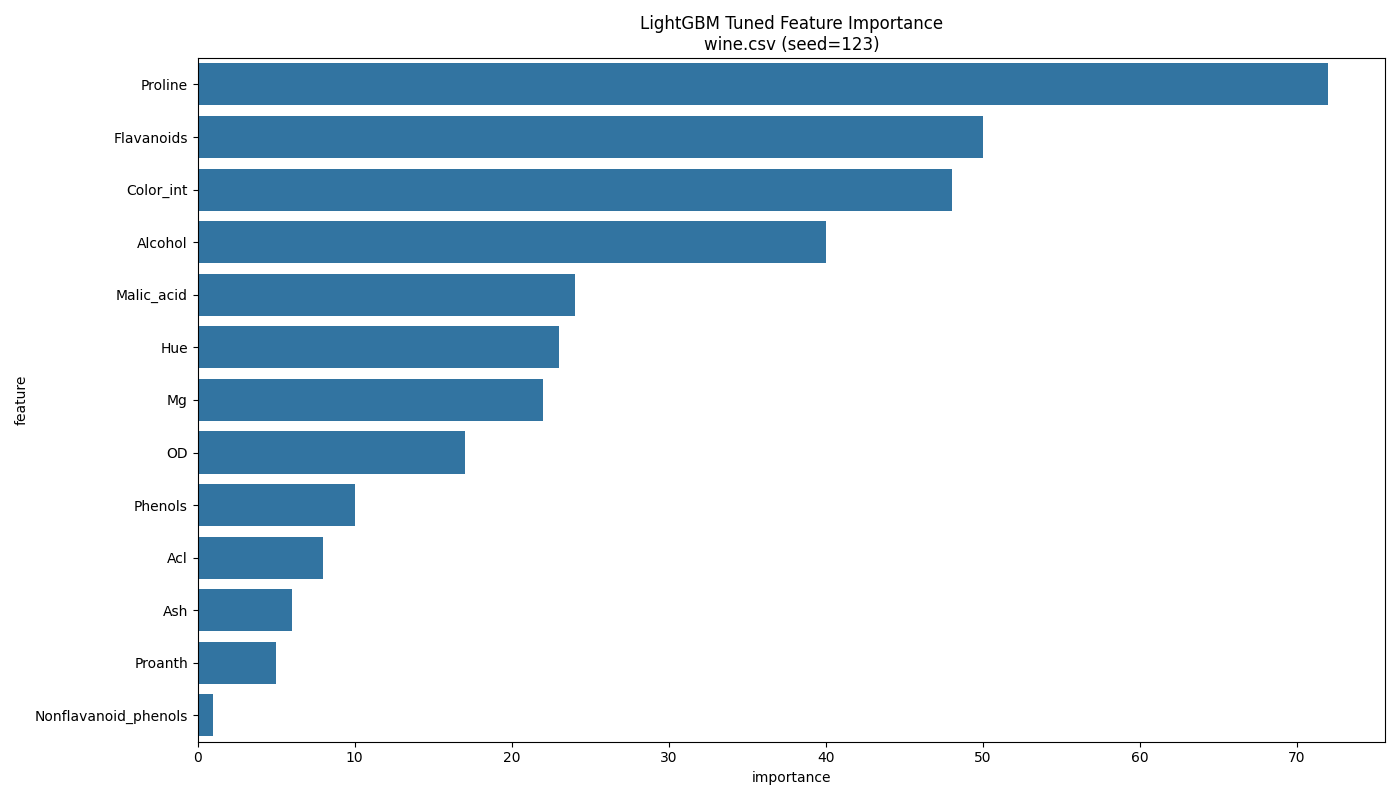

In [5]:
for dataset_name in data_dict_classification_only.keys():
    dataset_base = dataset_name.replace('.csv', '')
    
    csv_file1 = os.path.join(BOOSTINGS_TUNED_PATH, f"lightgbm_tuned_{dataset_base}_summary.csv")
    csv_file2 = os.path.join(RUNTIME_MEMORY_TASK2_BOOSTINGS_TUNED_PATH, f"lightgbm_tuned_{dataset_base}_runtime_memory_metrics.csv")

    print(f"CSV for {dataset_base}: lightgbm_tuned_{dataset_base}_summary.csv")
    df1 = pd.read_csv(csv_file1)
    display(df1)

    print(f"CSV for {dataset_base}: lightgbm_tuned_{dataset_base}_runtime_memory_metrics.csv")
    df2 = pd.read_csv(csv_file2)
    display(df2)

    for seed in RANDOM_SEEDS:
        img_path = os.path.join(FEATURE_IMPORTANCE_PATH, f"lightgbm_importance_{dataset_base}_seed{seed}.png")
        if os.path.exists(img_path):
            print(f"Feature Importance for {dataset_base} (seed={seed}):")
            display(Image(filename=img_path))





In [6]:
# ---------------- Task 3+9 ----------------

def evaluate_cv_folds_lightgbm(folds_dict):
    for dataset_file, folds_data in folds_dict.items():
        target_col = TARGET_COLS[dataset_file]
        summary = []
        runtime_memory_rows = []
        dataset_base = dataset_file.replace(".csv", "")

        for seed in RANDOM_SEEDS:
            np.random.seed(seed)
            random.seed(seed)
            fold_num = 1

            for fold_name, fold_splits in folds_data.items():
                df_train = fold_splits['train']
                df_val = fold_splits['val']

                X_train = df_train.drop(columns=[target_col])
                y_train = df_train[target_col]
                X_val = df_val.drop(columns=[target_col])
                y_val = df_val[target_col]

                temp_dir = tempfile.mkdtemp()

                start_time = time.time()
                model = lgb.LGBMClassifier(random_state=seed)
                model.fit(X_train, y_train)
                preds = model.predict(X_val)
                training_runtime_sec = round(time.time() - start_time, 3)

                infer_start = time.time()
                results = evaluate_and_save_results_boosting(df_train, df_val, model, dataset_file)
                inference_time_per_sample = round((time.time() - infer_start) / len(X_val), 6)

                temp_model_file = os.path.join(temp_dir, f"{dataset_base}_{seed}_fold{fold_num}.pkl")
                with open(temp_model_file, "wb") as f:
                    pickle.dump(model, f)
                total_bytes = os.path.getsize(temp_model_file)
                model_size_mb = round(total_bytes / (1024 * 1024), 3)
                shutil.rmtree(temp_dir, ignore_errors=True)

                memory_usage_mb = get_memory_usage_mb()
                cpu_usage_percent = psutil.cpu_percent(interval=None)

                runtime_memory_rows.append({
                    "dataset": dataset_file,
                    "seed": seed,
                    "fold": fold_num,
                    "training_runtime_sec": training_runtime_sec,
                    "model_size_MB": model_size_mb,
                    "memory_usage_MB": memory_usage_mb,
                    "inference_time_per_sample_sec": inference_time_per_sample,
                    "cpu_usage_percent": cpu_usage_percent
                })

                summary.append({
                    "dataset": dataset_file,
                    "seed": seed,
                    "fold": fold_num,
                    **results,
                    "runtime": training_runtime_sec
                })

                fold_num += 1
                del model
                gc.collect()

        output_path = os.path.join(CV_FOLDS_METRICS_PATH, f"lightgbm_{dataset_base}_cv_summary.csv")
        pd.DataFrame(summary).to_csv(output_path, index=False)

        task3_output_path = os.path.join(RUNTIME_MEMORY_TASK3_PATH, f"lightgbm_{dataset_base}_task3_runtime_memory_metrics.csv")
        pd.DataFrame(runtime_memory_rows).to_csv(task3_output_path, index=False)

        json_path = os.path.join(RUNTIME_MEMORY_TASK3_PATH, f"lightgbm_{dataset_base}_runtime_memory_metrics_cv_in_json.json")
        with open(json_path, 'w') as f:
            json.dump(runtime_memory_rows, f, indent=2)

evaluate_cv_folds_lightgbm(folds_dict)


[LightGBM] [Info] Number of positive: 46022, number of negative: 83650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 129672, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354911 -> initscore=-0.597522
[LightGBM] [Info] Start training from score -0.597522
[LightGBM] [Info] Number of positive: 46022, number of negative: 83650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 129672, number of used features: 142
[LightGBM] [Info

In [7]:
for dataset_name in data_dict_classification_only.keys():
    dataset_base = dataset_name.replace('.csv', '')
    csv_file1 = os.path.join(CV_FOLDS_METRICS_PATH, f"lightgbm_{dataset_base}_cv_summary.csv")
    csv_file2 = os.path.join(RUNTIME_MEMORY_TASK3_PATH, f"lightgbm_{dataset_base}_task3_runtime_memory_metrics.csv")

    print(f"CSV for {dataset_base}: lightgbm_{dataset_base}_cv_summary.csv")
    df1 = pd.read_csv(csv_file1)
    display(df1)

    print(f"CSV for {dataset_base}: lightgbm_{dataset_base}_task3_runtime_memory_metrics.csv")
    df2 = pd.read_csv(csv_file2)
    display(df2)



CSV for modeldata: lightgbm_modeldata_cv_summary.csv


dataset  seed  fold  accuracy        f1  precision    recall  runtime
0  modeldata.csv    42     1  0.928096  0.928229   0.928435  0.928096    0.593
1  modeldata.csv    42     2  0.928589  0.928747   0.929007  0.928589    0.590
2  modeldata.csv    42     3  0.929391  0.929539   0.929780  0.929391    0.594
3  modeldata.csv    42     4  0.925504  0.925685   0.925991  0.925504    0.601
4  modeldata.csv    42     5  0.934296  0.934375   0.934485  0.934296    0.614
5  modeldata.csv   123     1  0.928096  0.928229   0.928435  0.928096    0.602
6  modeldata.csv   123     2  0.928589  0.928747   0.929007  0.928589    0.598
7  modeldata.csv   123     3  0.929391  0.929539   0.929780  0.929391    0.602
8  modeldata.csv   123     4  0.925504  0.925685   0.925991  0.925504    0.591
9  modeldata.csv   123     5  0.934296  0.934375   0.934485  0.934296    0.599

CSV for modeldata: lightgbm_modeldata_task3_runtime_memory_metrics.csv


dataset  seed  fold  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  modeldata.csv    42     1                 0.593          0.352         7438.020                       0.000004               79.1
1  modeldata.csv    42     2                 0.590          0.352         7413.820                       0.000004               75.7
2  modeldata.csv    42     3                 0.594          0.353         7417.105                       0.000004               83.5
3  modeldata.csv    42     4                 0.601          0.352         7416.246                       0.000004               87.9
4  modeldata.csv    42     5                 0.614          0.352         7502.641                       0.000003               74.4
5  modeldata.csv   123     1                 0.602          0.352         7510.074                       0.000004               69.1
6  modeldata.csv   123     2                 0.598          0.352         7426.992                       0.000004               76.1
7  modeldata.csv   123     3                 0.602          0.353         7450.746                       0.000003               74.9
8  modeldata.csv   123     4                 0.591          0.352         7504.395                       0.000003               79.6
9  modeldata.csv   123     5                 0.599          0.352         7533.543                       0.000004               77.8

CSV for titanic: lightgbm_titanic_cv_summary.csv


dataset  seed  fold  accuracy        f1  precision    recall  runtime
0  titanic.csv    42     1  0.854749  0.853376   0.854051  0.854749    0.062
1  titanic.csv    42     2  0.831461  0.831461   0.831461  0.831461    0.064
2  titanic.csv    42     3  0.769663  0.769331   0.769049  0.769663    0.068
3  titanic.csv    42     4  0.803371  0.801803   0.801568  0.803371    0.060
4  titanic.csv    42     5  0.820225  0.816354   0.820655  0.820225    0.060
5  titanic.csv   123     1  0.854749  0.853376   0.854051  0.854749    0.064
6  titanic.csv   123     2  0.831461  0.831461   0.831461  0.831461    0.059
7  titanic.csv   123     3  0.769663  0.769331   0.769049  0.769663    0.067
8  titanic.csv   123     4  0.803371  0.801803   0.801568  0.803371    0.065
9  titanic.csv   123     5  0.820225  0.816354   0.820655  0.820225    0.067

CSV for titanic: lightgbm_titanic_task3_runtime_memory_metrics.csv


dataset  seed  fold  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  titanic.csv    42     1                 0.062          0.371         6964.566                       0.000056               86.1
1  titanic.csv    42     2                 0.064          0.371         6964.648                       0.000060               84.9
2  titanic.csv    42     3                 0.068          0.376         6964.258                       0.000097               89.9
3  titanic.csv    42     4                 0.060          0.372         6964.719                       0.000060               80.2
4  titanic.csv    42     5                 0.060          0.369         6964.441                       0.000060               76.8
5  titanic.csv   123     1                 0.064          0.371         6964.539                       0.000061               92.6
6  titanic.csv   123     2                 0.059          0.371         6964.543                       0.000057               84.5
7  titanic.csv   123     3                 0.067          0.376         6964.566                       0.000070               89.2
8  titanic.csv   123     4                 0.065          0.372         6964.578                       0.000064               78.3
9  titanic.csv   123     5                 0.067          0.369         6964.578                       0.000056               93.4

CSV for train: lightgbm_train_cv_summary.csv


dataset  seed  fold  accuracy        f1  precision    recall  runtime
0  train.csv    42     1  0.966667  0.966583   0.969697  0.966667    0.036
1  train.csv    42     2  1.000000  1.000000   1.000000  1.000000    0.036
2  train.csv    42     3  0.900000  0.897698   0.923077  0.900000    0.035
3  train.csv    42     4  0.966667  0.966583   0.969697  0.966667    0.034
4  train.csv    42     5  0.900000  0.899749   0.902357  0.900000    0.033
5  train.csv   123     1  0.966667  0.966583   0.969697  0.966667    0.034
6  train.csv   123     2  1.000000  1.000000   1.000000  1.000000    0.035
7  train.csv   123     3  0.900000  0.897698   0.923077  0.900000    0.035
8  train.csv   123     4  0.966667  0.966583   0.969697  0.966667    0.033
9  train.csv   123     5  0.900000  0.899749   0.902357  0.900000    0.034

CSV for train: lightgbm_train_task3_runtime_memory_metrics.csv


dataset  seed  fold  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  train.csv    42     1                 0.036          0.204         6964.988                       0.000255               83.0
1  train.csv    42     2                 0.036          0.213         6965.395                       0.000260               95.5
2  train.csv    42     3                 0.035          0.206         6965.387                       0.000237               91.0
3  train.csv    42     4                 0.034          0.203         6965.395                       0.000293               73.2
4  train.csv    42     5                 0.033          0.195         6965.598                       0.000256               78.3
5  train.csv   123     1                 0.034          0.204         6965.602                       0.000272               89.1
6  train.csv   123     2                 0.035          0.213         6965.645                       0.000246               86.5
7  train.csv   123     3                 0.035          0.206         6965.695                       0.000267               63.2
8  train.csv   123     4                 0.033          0.203         6965.695                       0.000242               92.5
9  train.csv   123     5                 0.034          0.195         6965.695                       0.000271               75.8

CSV for wine: lightgbm_wine_cv_summary.csv


dataset  seed  fold  accuracy        f1  precision    recall  runtime
0  wine.csv    42     1  0.972222  0.972369   0.974747  0.972222    0.039
1  wine.csv    42     2  1.000000  1.000000   1.000000  1.000000    0.038
2  wine.csv    42     3  0.972222  0.972369   0.974747  0.972222    0.040
3  wine.csv    42     4  0.885714  0.882749   0.886667  0.885714    0.041
4  wine.csv    42     5  1.000000  1.000000   1.000000  1.000000    0.039
5  wine.csv   123     1  0.972222  0.972369   0.974747  0.972222    0.042
6  wine.csv   123     2  1.000000  1.000000   1.000000  1.000000    0.039
7  wine.csv   123     3  0.972222  0.972369   0.974747  0.972222    0.041
8  wine.csv   123     4  0.885714  0.882749   0.886667  0.885714    0.040
9  wine.csv   123     5  1.000000  1.000000   1.000000  1.000000    0.042

CSV for wine: lightgbm_wine_task3_runtime_memory_metrics.csv


dataset  seed  fold  training_runtime_sec  model_size_MB  memory_usage_MB  inference_time_per_sample_sec  cpu_usage_percent
0  wine.csv    42     1                 0.039          0.256         6965.828                       0.000215               83.0
1  wine.csv    42     2                 0.038          0.251         6965.887                       0.000250               89.9
2  wine.csv    42     3                 0.040          0.255         6965.902                       0.000243               73.5
3  wine.csv    42     4                 0.041          0.253         6964.980                       0.000258               73.0
4  wine.csv    42     5                 0.039          0.258         6965.633                       0.000243               78.0
5  wine.csv   123     1                 0.042          0.256         6965.676                       0.000222               80.1
6  wine.csv   123     2                 0.039          0.251         6966.090                       0.000216               82.5
7  wine.csv   123     3                 0.041          0.255         6966.156                       0.000201               80.8
8  wine.csv   123     4                 0.040          0.253         6966.262                       0.000205               80.4
9  wine.csv   123     5                 0.042          0.258         6966.418                       0.000229               86.4

In [3]:
# ---------------- Task 6 ----------------

import lightgbm as lgb


def evaluate_pipeline_folds_times_lightgbm(final_output):

    for dataset_name, folds in final_output.items():
        dataset_base = dataset_name.replace('.csv', '')

        dataset_summary = []
        time_log_rows = []

        target_col = TARGET_COLS[dataset_name]

        for seed in RANDOM_SEEDS_PIPELINE:

            np.random.seed(seed)
            random.seed(seed)

            for fold_name, split in folds.items():

                df_train = split['train'].copy()
                df_val = split['val'].copy()
                pipe_times = split['pipeline_time']

                pipe_times_copy = pipe_times.copy()
                pipe_times_copy["total_time"] = sum(pipe_times_copy.values())

                X_train = df_train.drop(columns=[target_col])
                y_train = df_train[target_col]

                X_val = df_val.drop(columns=[target_col])
                y_val = df_val[target_col]

                start = time.time()

                model = lgb.LGBMClassifier(
                    random_state=seed,
                    n_estimators=5000,
                    boosting_type="gbdt",
                    objective="multiclass"
                    if len(np.unique(y_train)) > 2
                    else "binary",
                )

                model.fit(
                    X_train, y_train,
                    eval_set=[(X_val, y_val)],
                    eval_metric="logloss",
                    callbacks=[lgb.early_stopping(50)],
                    )


                preds = model.predict(X_val)

                runtime = round(time.time() - start, 3)
                fold_idx = int(fold_name.split("_")[1])

                best_model = "LightGBM"


                
                dataset_summary.append({
                    "dataset": dataset_name,
                    "seed": seed,
                    "fold": fold_idx,
                    "model_name": best_model,
                    "accuracy": (accuracy_score(y_val, preds)),
                    "f1": (f1_score(y_val, preds, average='weighted')),
                    "precision": (precision_score(y_val, preds, average='weighted')),
                    "recall": (recall_score(y_val, preds, average='weighted')),
                    "runtime": runtime
                })

                

                row = {"dataset": dataset_name, "fold": fold_idx, "model_name": best_model}
                row.update(pipe_times_copy)
                time_log_rows.append(row)

        df_summary = pd.DataFrame(dataset_summary).drop_duplicates()
        df_times = pd.DataFrame(time_log_rows).drop_duplicates()

        df_summary = df_summary.sort_values(["dataset", "seed", "fold"])
        df_times = df_times.sort_values(["dataset", "fold"])

        summary_path = os.path.join(
            PIPELINE_DATAFRAMES_METRICS_PATH,
            f"lightgbm_{dataset_base}_pipeline_summary.csv"
        )
        df_summary.to_csv(summary_path, index=False)

        time_log_path = os.path.join(
            PIPELINE_LOG_TIMES_PATH,
            f"lightgbm_{dataset_base}_pipeline_time_log.csv"
        )
        df_times.to_csv(time_log_path, index=False)




evaluate_pipeline_folds_times_lightgbm(run_pipeline_on_folds_with_control(pipeline_data_dict))






[LightGBM] [Info] Number of positive: 28764, number of negative: 52281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 81045, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354914 -> initscore=-0.597508
[LightGBM] [Info] Start training from score -0.597508
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[324]	valid_0's binary_logloss: 0.165549
[LightGBM] [Info] Number of positive: 28764, number of negative: 52281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

In [4]:
for dataset_name in data_dict_classification_only.keys():
    dataset_base = dataset_name.replace('.csv', '')
    
    csv_file_1 = os.path.join(PIPELINE_DATAFRAMES_METRICS_PATH, f"lightgbm_{dataset_base}_pipeline_summary.csv")
    csv_file_2 = os.path.join(PIPELINE_LOG_TIMES_PATH, f"lightgbm_{dataset_base}_pipeline_time_log.csv")
    
    df1 = pd.read_csv(csv_file_1)
    df2 = pd.read_csv(csv_file_2)
    
    print(f"CSV for {dataset_base}: lightgbm_{dataset_base}_pipeline_summary.csv")
    display(df1) 
    print(f"CSV for {dataset_base}: lightgbm_{dataset_base}_pipeline_time_log.csv")
    display(df2) 



CSV for modeldata: lightgbm_modeldata_pipeline_summary.csv


dataset  seed  fold model_name  accuracy        f1  precision    recall  runtime
0  modeldata.csv    42     1   LightGBM  0.920180  0.920042   0.919961  0.920180   12.913
1  modeldata.csv    42     2   LightGBM  0.926103  0.926233   0.926427  0.926103    1.438
2  modeldata.csv   123     1   LightGBM  0.920180  0.920042   0.919961  0.920180    1.811
3  modeldata.csv   123     2   LightGBM  0.926103  0.926233   0.926427  0.926103    1.560

CSV for modeldata: lightgbm_modeldata_pipeline_time_log.csv


dataset  fold model_name  preprocessing  nan_guard_before_vif       vif    binner  nan_guard_before_poly  selector  total_time
0  modeldata.csv     1   LightGBM       0.583998              0.187286  0.019159  0.077163               0.076099  0.038704    0.982410
1  modeldata.csv     2   LightGBM       0.649239              0.239897  0.017164  0.058515               0.051761  0.034792    1.051368

CSV for titanic: lightgbm_titanic_pipeline_summary.csv


dataset  seed  fold model_name  accuracy        f1  precision    recall  runtime
0  titanic.csv    42     1   LightGBM  0.811659  0.802421   0.821529  0.811659    0.085
1  titanic.csv    42     2   LightGBM  0.829213  0.821302   0.840371  0.829213    0.083
2  titanic.csv   123     1   LightGBM  0.811659  0.802421   0.821529  0.811659    0.081
3  titanic.csv   123     2   LightGBM  0.829213  0.821302   0.840371  0.829213    0.077

CSV for titanic: lightgbm_titanic_pipeline_time_log.csv


dataset  fold model_name  preprocessing  nan_guard_before_vif       vif    binner  nan_guard_before_poly      poly  selector  total_time
0  titanic.csv     1   LightGBM       0.017158              0.005100  0.002013  0.004021               0.001026  0.018134  0.006081    0.053534
1  titanic.csv     2   LightGBM       0.009380              0.002018  0.000000  0.002006               0.001002  0.010074  0.002023    0.026504

CSV for train: lightgbm_train_pipeline_summary.csv


dataset  seed  fold model_name  accuracy        f1  precision    recall  runtime
0  train.csv    42     1   LightGBM  0.946667  0.946581   0.948470  0.946667    0.094
1  train.csv    42     2   LightGBM  0.946667  0.946667   0.946667  0.946667    2.531
2  train.csv   123     1   LightGBM  0.946667  0.946581   0.948470  0.946667    0.098
3  train.csv   123     2   LightGBM  0.946667  0.946667   0.946667  0.946667    2.465

CSV for train: lightgbm_train_pipeline_time_log.csv


dataset  fold model_name  preprocessing  nan_guard_before_vif       vif   binner  nan_guard_before_poly  poly  selector  total_time
0  train.csv     1   LightGBM       0.001002              0.000000  0.001395  0.00000               0.001003   0.0       0.0    0.003400
1  train.csv     2   LightGBM       0.001091              0.001293  0.000000  0.00101               0.000000   0.0       0.0    0.003394

CSV for wine: lightgbm_wine_pipeline_summary.csv


dataset  seed  fold model_name  accuracy        f1  precision    recall  runtime
0  wine.csv    42     1   LightGBM  0.943820  0.943820   0.943820  0.943820    0.074
1  wine.csv    42     2   LightGBM  0.853933  0.853265   0.864788  0.853933    0.052
2  wine.csv   123     1   LightGBM  0.943820  0.943820   0.943820  0.943820    0.064
3  wine.csv   123     2   LightGBM  0.853933  0.853265   0.864788  0.853933    0.052

CSV for wine: lightgbm_wine_pipeline_time_log.csv


dataset  fold model_name  preprocessing  nan_guard_before_vif  vif    binner  nan_guard_before_poly  poly  selector  total_time
0  wine.csv     1   LightGBM       0.001002              0.001002  0.0  0.001002                    0.0   0.0       0.0    0.003006
1  wine.csv     2   LightGBM       0.002467              0.000000  0.0  0.001003                    0.0   0.0       0.0    0.003470